# Walkthrough

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('BlackFriday.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
## Delete columns Product_Category_2 and Product_Category_3
del df['Product_Category_2']
del df['Product_Category_3']

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Analyzing Columns

In [10]:
df['User_ID'].nunique()

5891

In [11]:
df['Product_ID'].nunique()

3623

In [12]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [15]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [18]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [19]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [20]:
for columns in df.columns:
    print(columns,':',df[columns].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# Analyzing Gender

<Axes: ylabel='Ratio'>

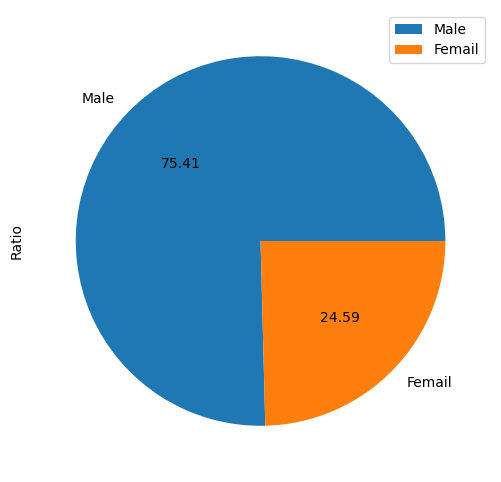

In [22]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']),len(df[df['Gender'] == 'F'])]}, index = ['Male','Femail'])
data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.2f")

<Axes: title={'center': 'Gender Ratio'}>

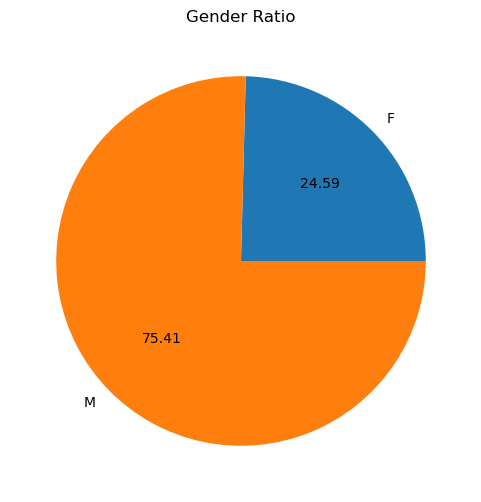

In [23]:
df.groupby('Gender').size().plot(kind = 'pie',
                                 autopct = "%.2f",
                                 title = "Gender Ratio",
                                 figsize = (6,6))

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

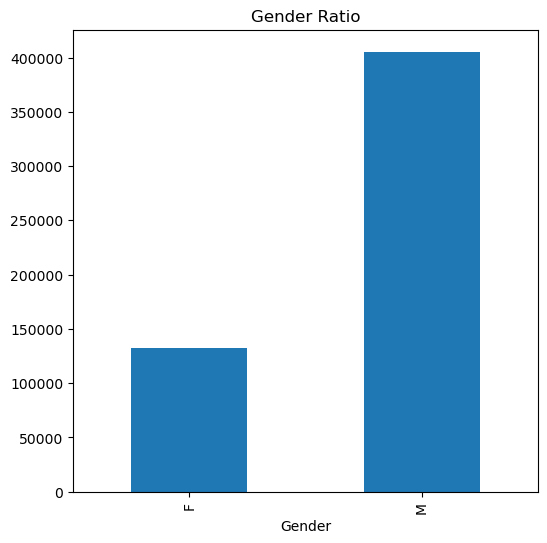

In [24]:
df.groupby('Gender').size().plot(kind = 'bar',
                                 title = "Gender Ratio",
                                 figsize = (6,6))

In [25]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: ylabel='Purchase'>

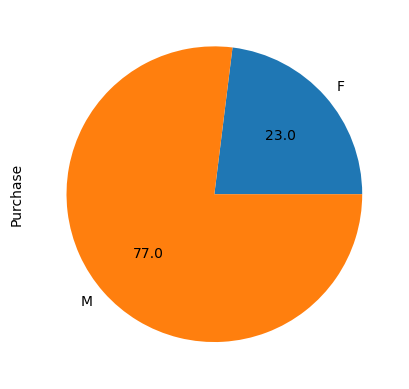

In [26]:
df.head(100000).groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<Axes: ylabel='Purchase'>

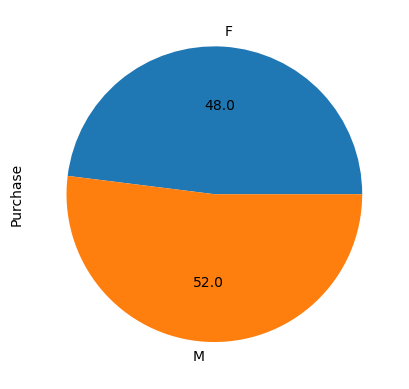

In [27]:
df.head(100000).groupby('Gender')['Purchase'].mean().plot(kind='pie', autopct="%0.1f")

# Analysing Age & Marital Status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

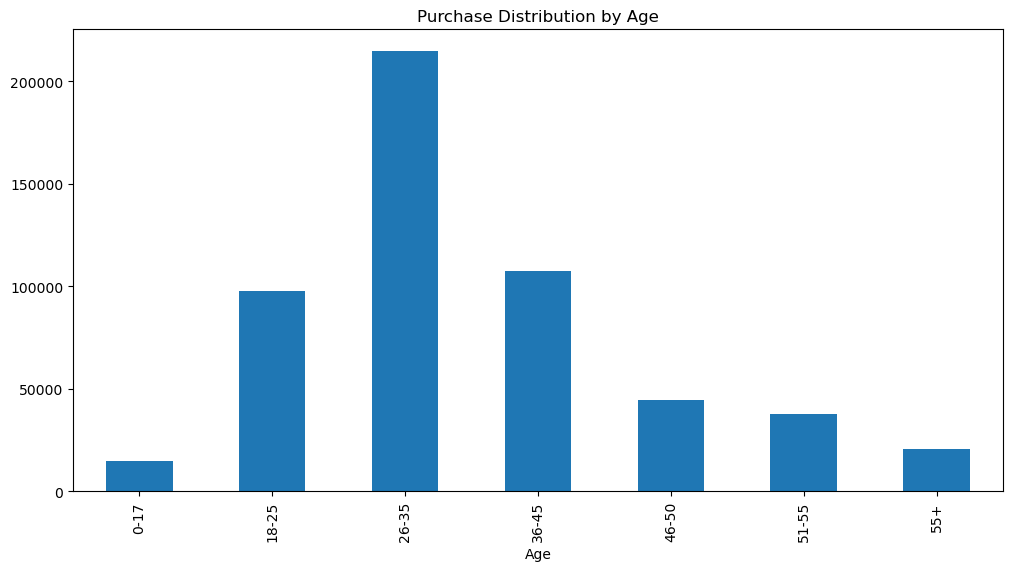

In [29]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

In [30]:
lst = []
for i in df['Age'].unique():
    lst.append([i,df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst, columns = ['Age', 'Products'])

<Axes: xlabel='Age'>

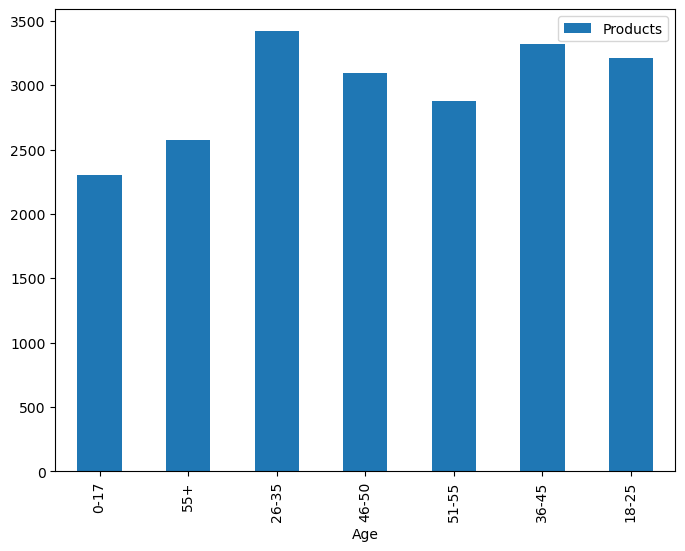

In [31]:
data.plot.bar(x = 'Age', figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

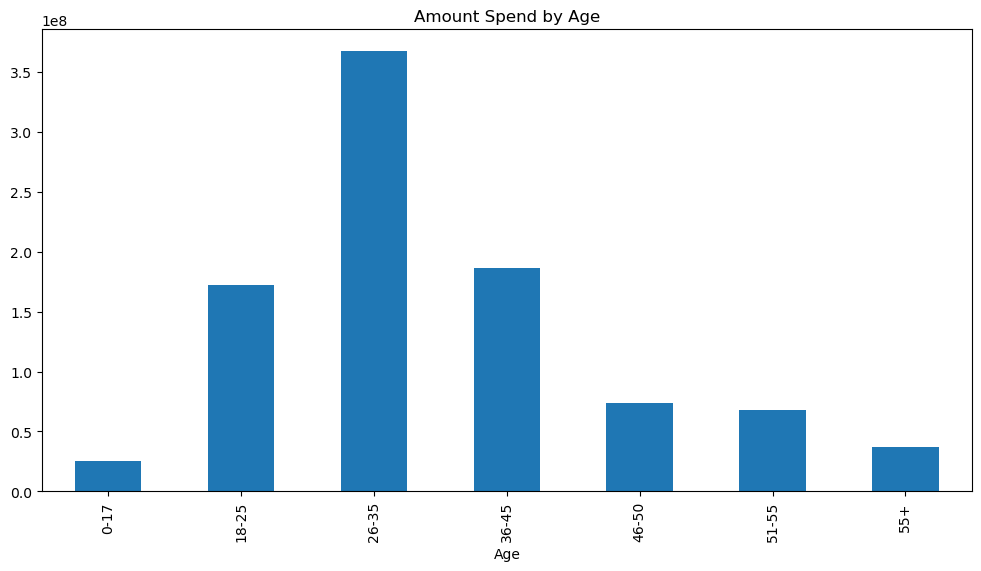

In [32]:
df.head(100000).groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

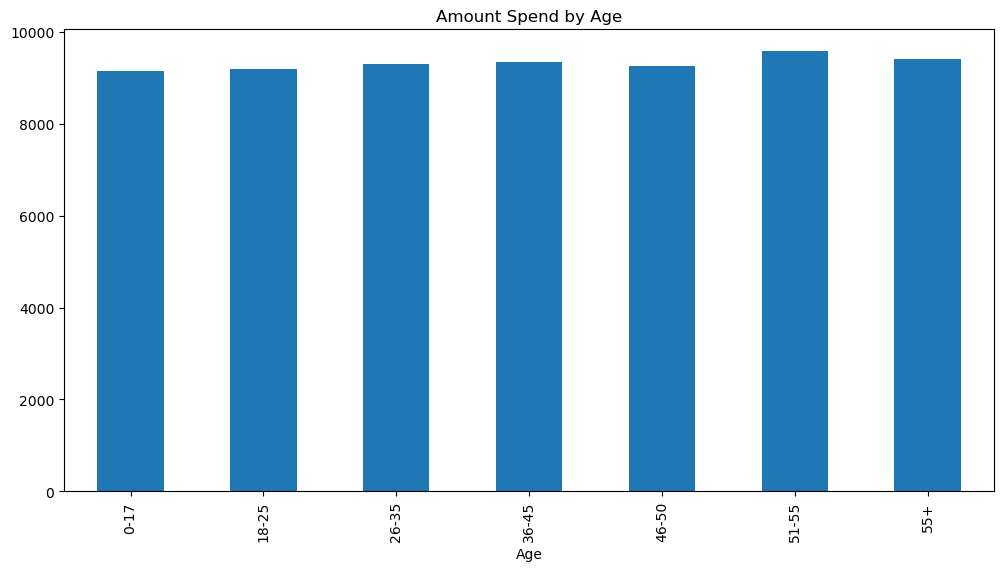

In [33]:
df.head(100000).groupby('Age')['Purchase'].mean()  .plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: ylabel='Purchase'>

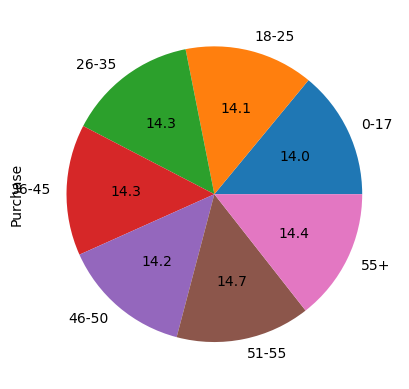

In [34]:
df.head(100000).groupby('Age')['Purchase'].mean().plot(kind = 'pie', autopct = "%.1f")

<Axes: ylabel='Purchase'>

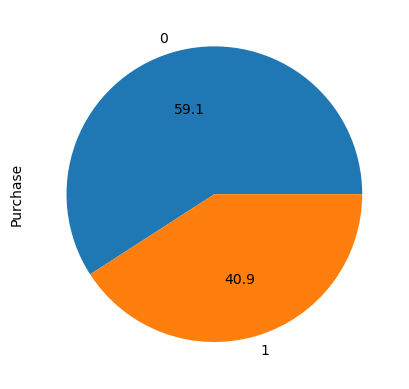

In [35]:
df.head(100000).groupby('Marital_Status')['Purchase'].size().plot(kind = 'pie', autopct = "%.1f")

<Axes: ylabel='Purchase'>

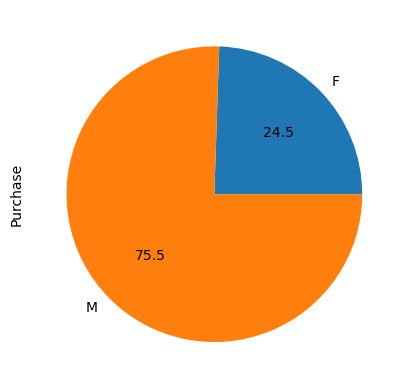

In [36]:
df.head(100000).groupby('Gender')['Purchase'].size().plot(kind = 'pie', autopct = "%.1f")

# Multi Column Analysis

In [38]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

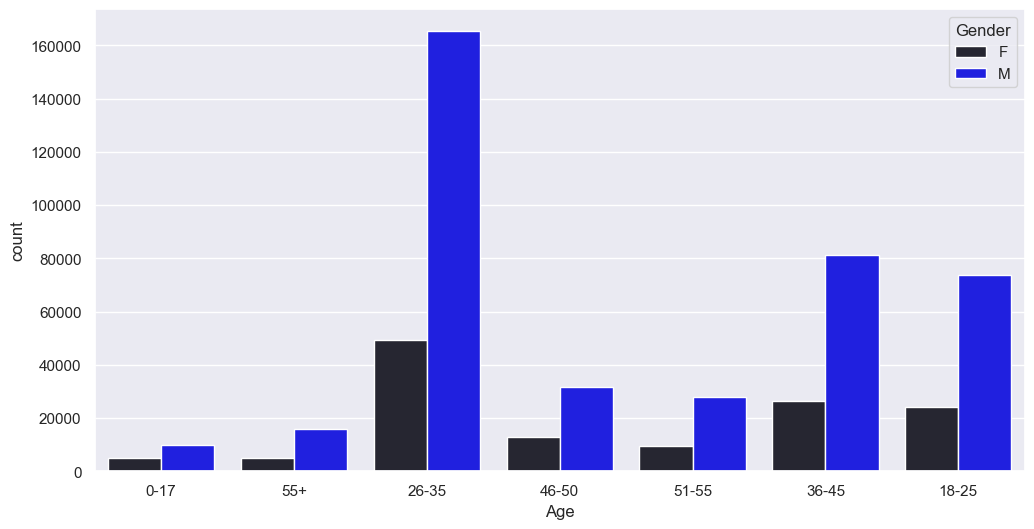

In [39]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Age',hue = 'Gender',data = df, palette = 'dark:blue')

<Axes: xlabel='Gender', ylabel='count'>

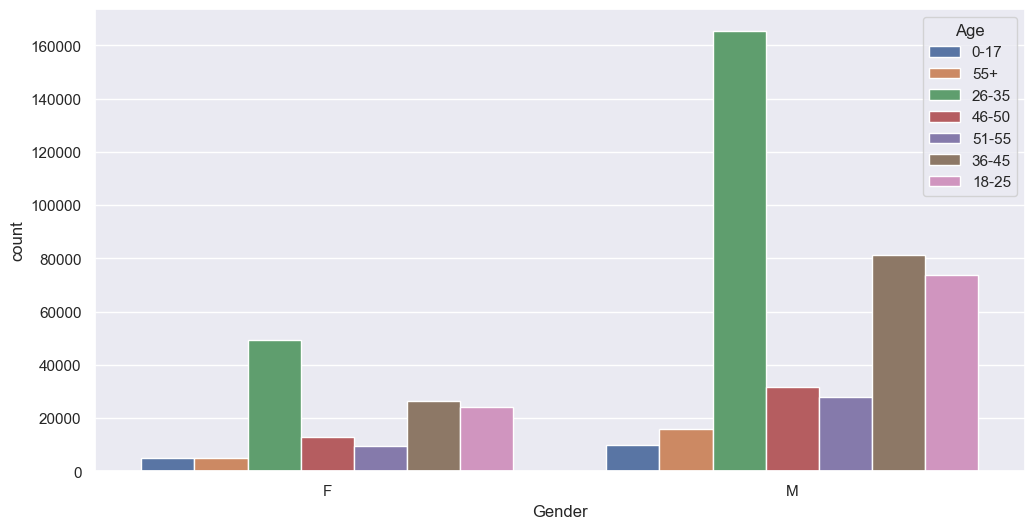

In [40]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Gender',hue = 'Age',data = df)

<Axes: xlabel='Gender', ylabel='count'>

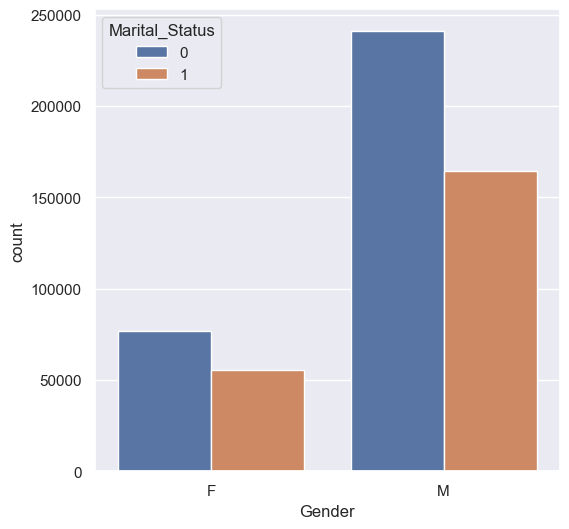

In [41]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = 'Gender',hue = 'Marital_Status',data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

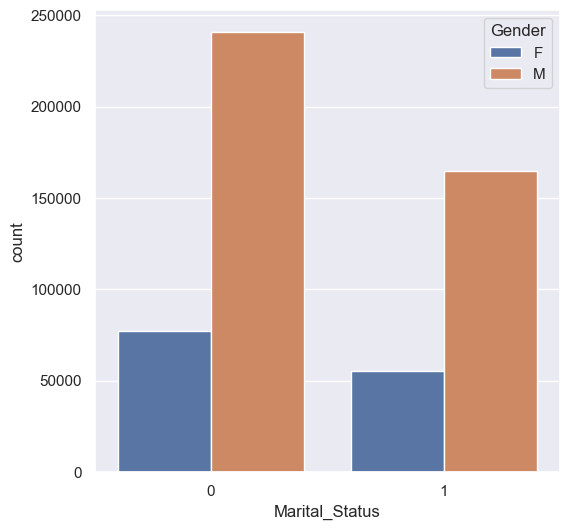

In [42]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = 'Marital_Status',hue = 'Gender',data = df)

<Axes: xlabel='City_Category', ylabel='count'>

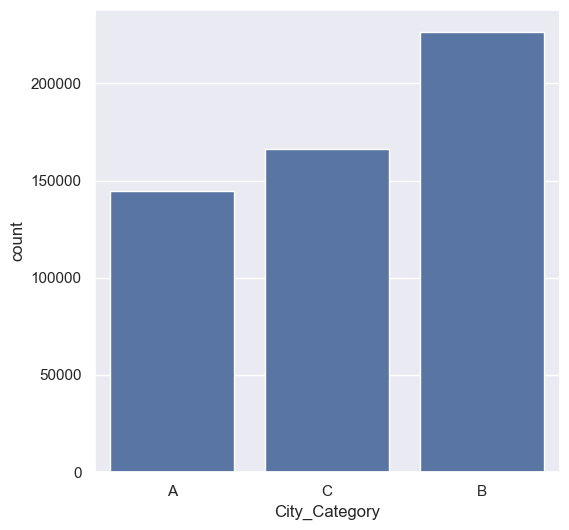

In [43]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

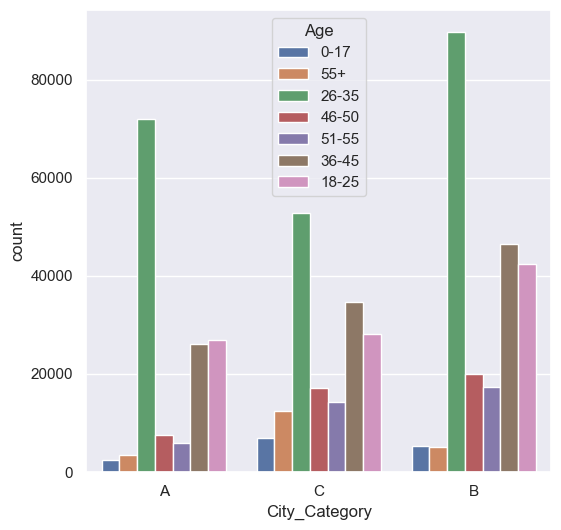

In [44]:
sns.countplot(x = "City_Category",hue = 'Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

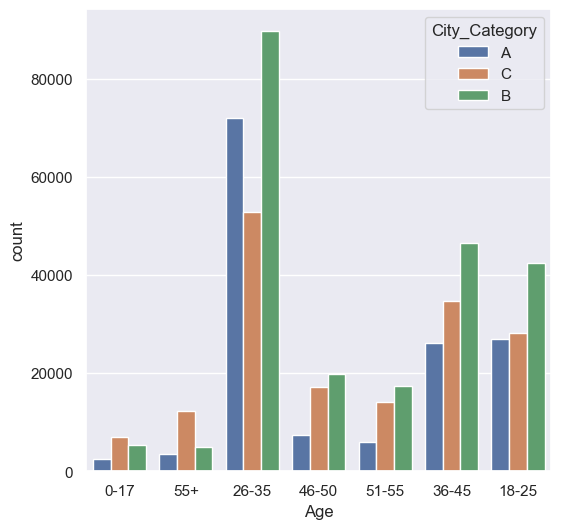

In [45]:
sns.countplot(x = "Age",hue = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

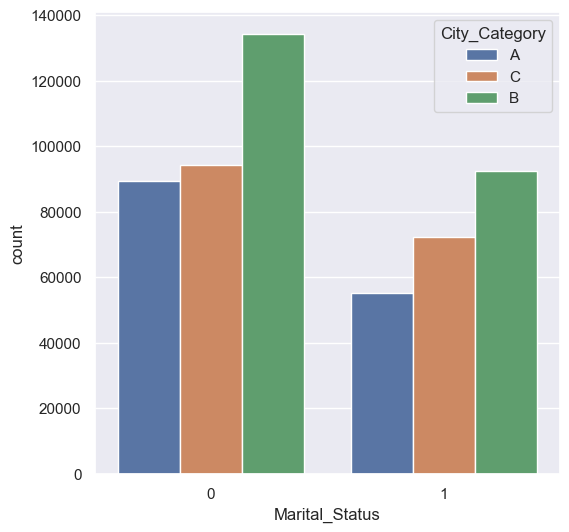

In [46]:
sns.countplot(x = "Marital_Status",hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

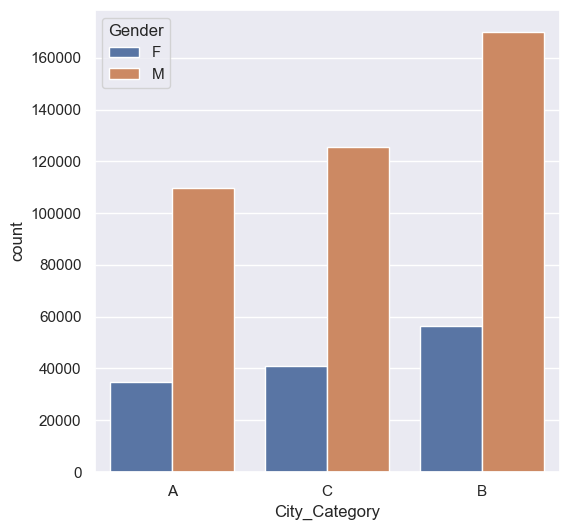

In [47]:
sns.countplot(x = "City_Category",hue = 'Gender', data = df)

<Axes: >

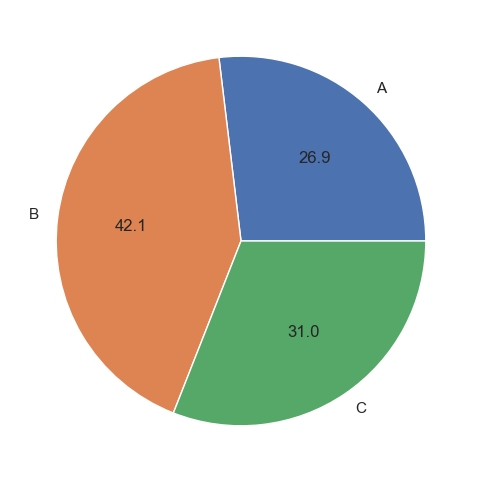

In [48]:
df.groupby('City_Category').size().plot(kind = 'pie',autopct = "%.1f")

<Axes: ylabel='Purchase'>

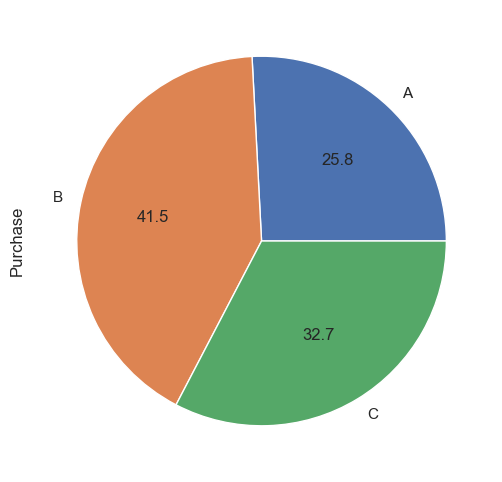

In [49]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie', autopct = "%0.1f")

<Axes: ylabel='Purchase'>

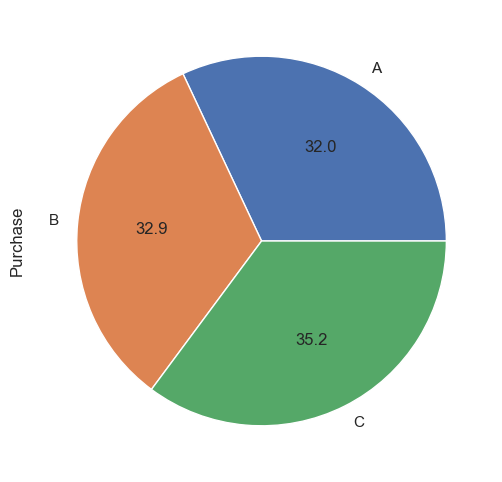

In [50]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie', autopct="%0.1f")

# Occupation and Products Analysis

In [100]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

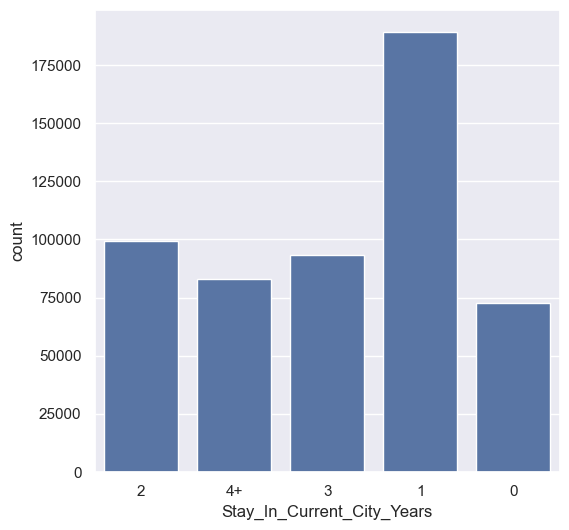

In [104]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: >

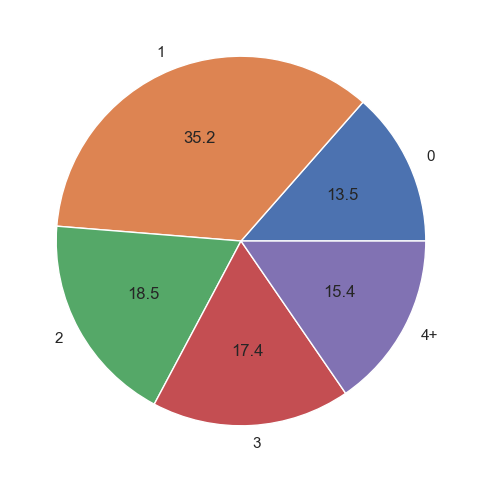

In [126]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

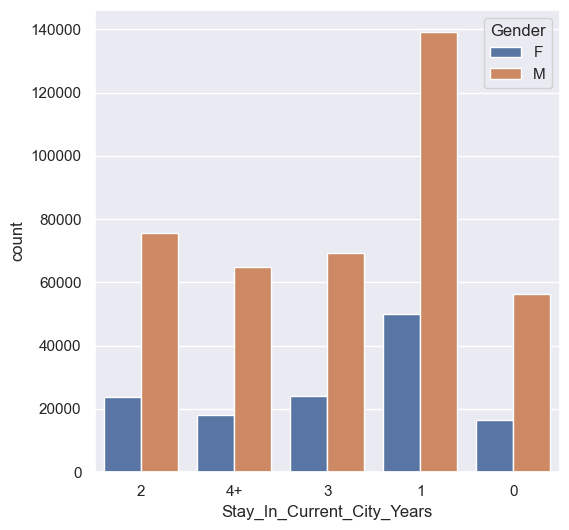

In [106]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

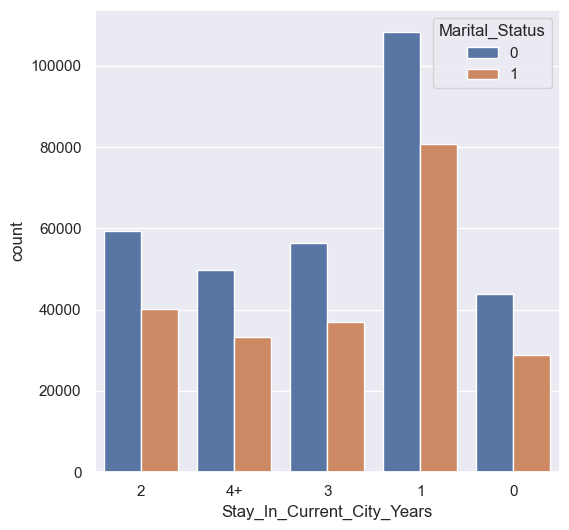

In [110]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

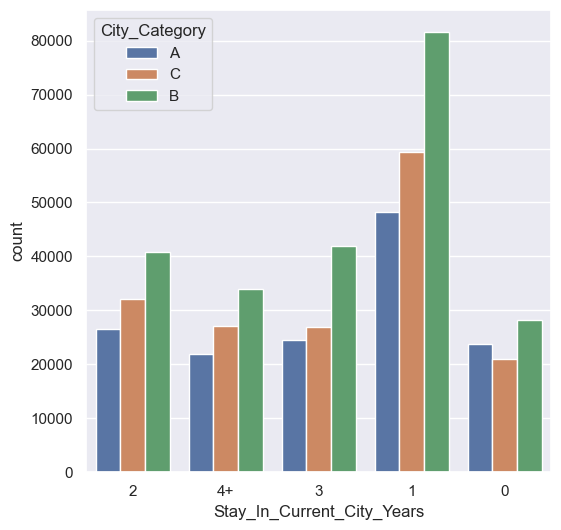

In [112]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

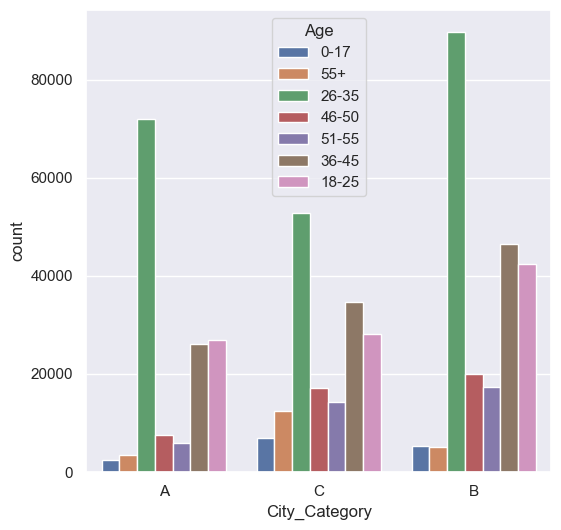

In [129]:
sns.countplot(x='City_Category', hue = 'Age', data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

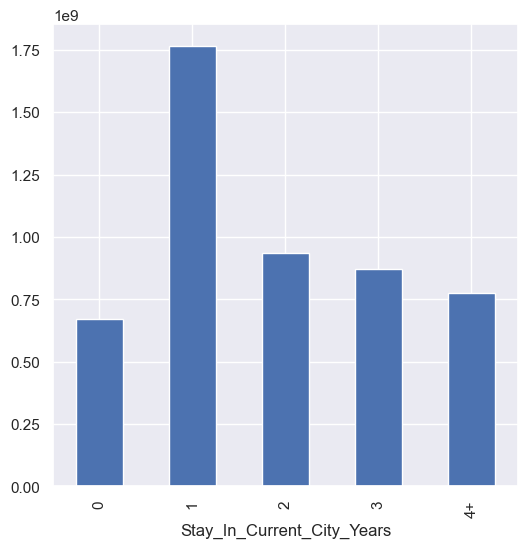

In [136]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

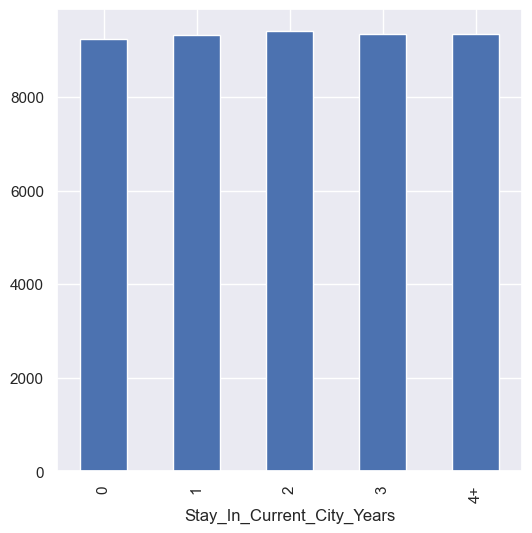

In [138]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

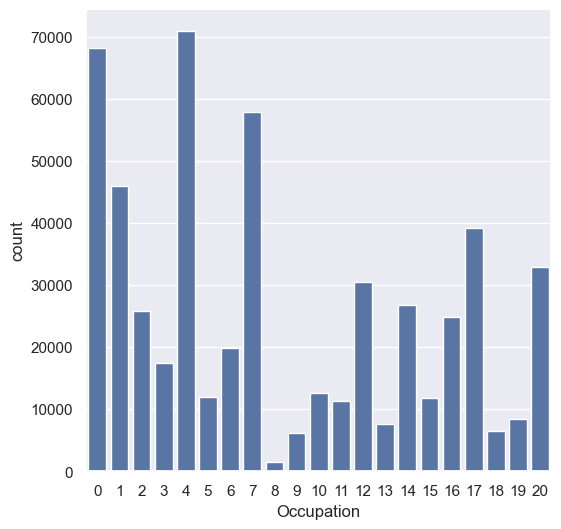

In [140]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

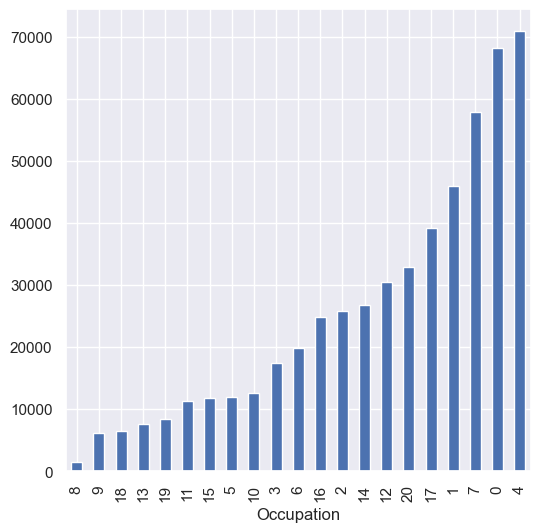

In [148]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

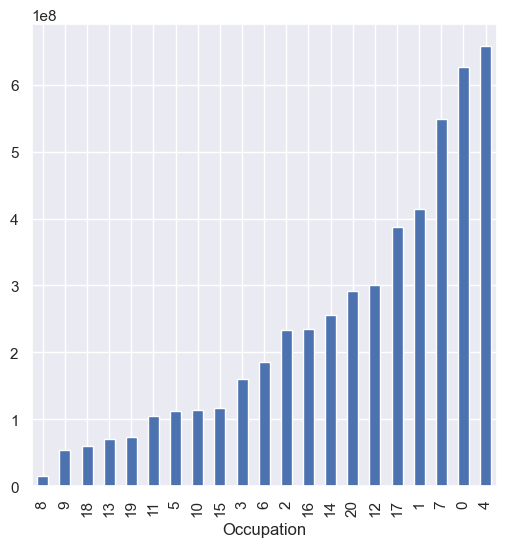

In [150]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

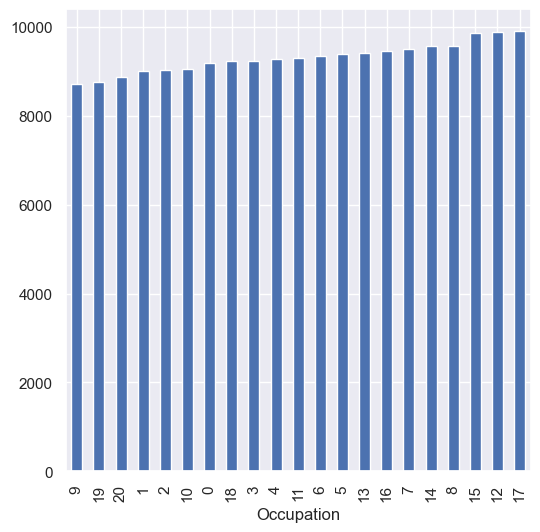

In [152]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

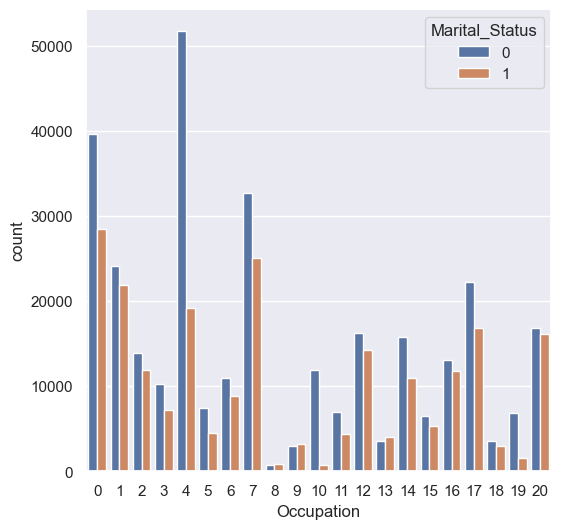

In [170]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

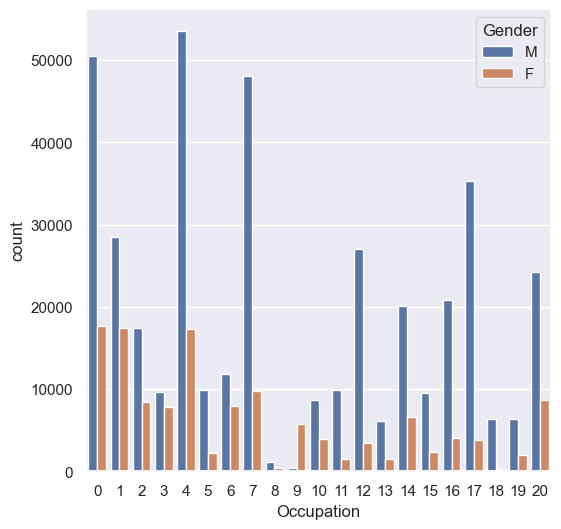

In [172]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

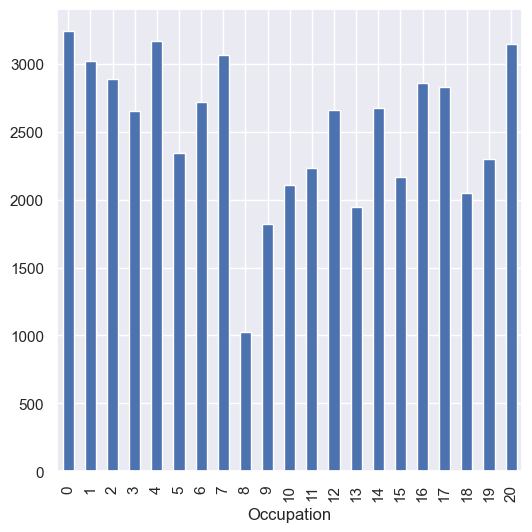

In [182]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

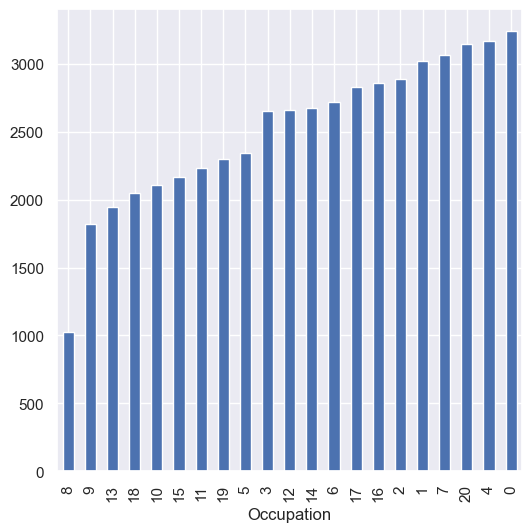

In [184]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

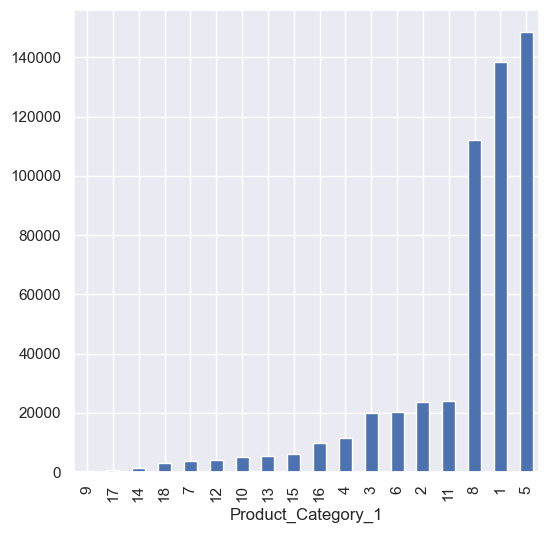

In [194]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

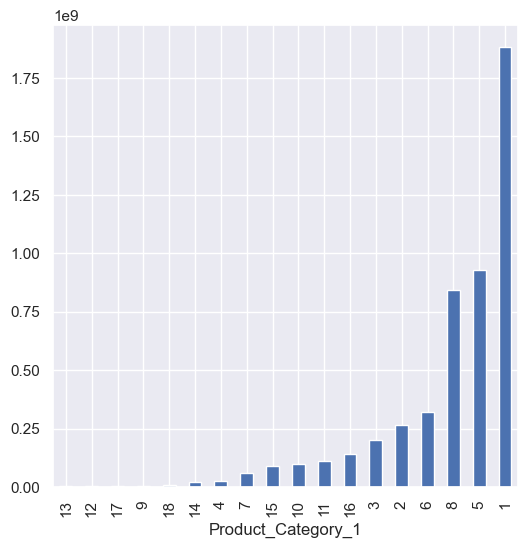

In [203]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

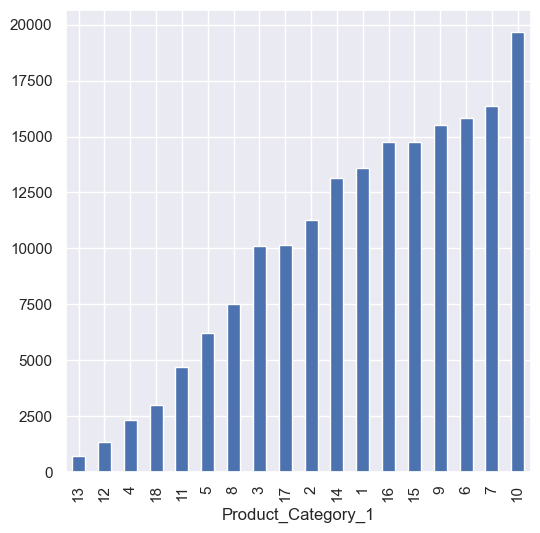

In [204]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

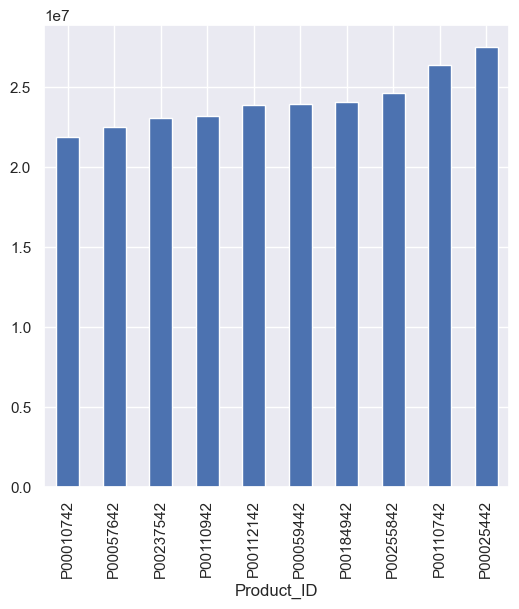

In [212]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

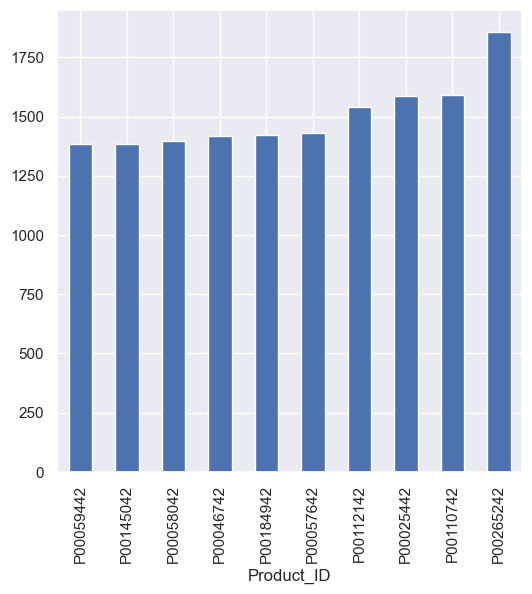

In [220]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

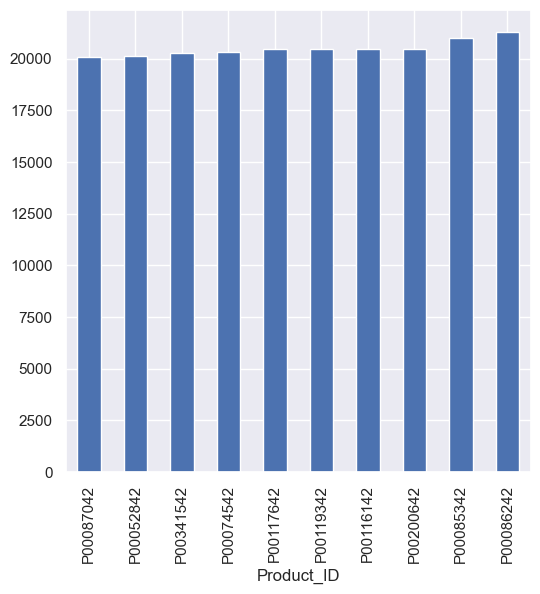

In [224]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

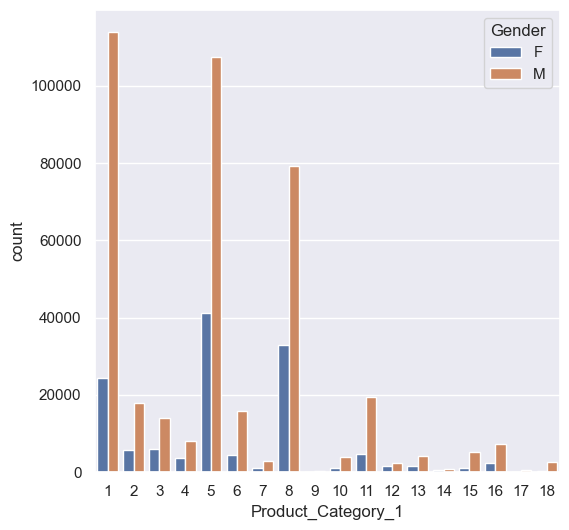

In [228]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

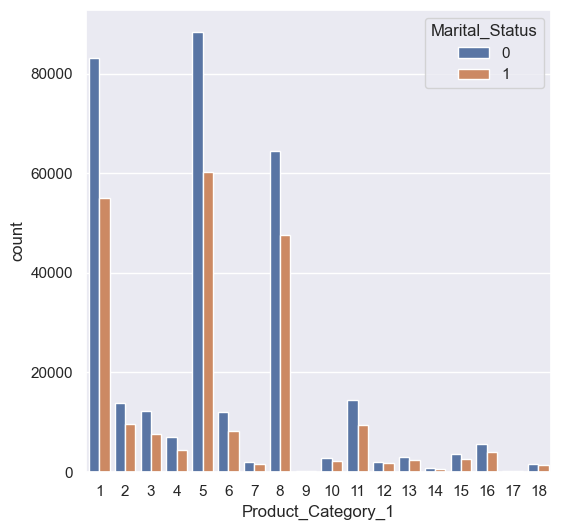

In [230]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

# Combining Gender & Marital Status

In [257]:
lst = []
for i in range(len(df)):
    lst.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))
df['Marital_Gender'] = lst

In [258]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_GEnder,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

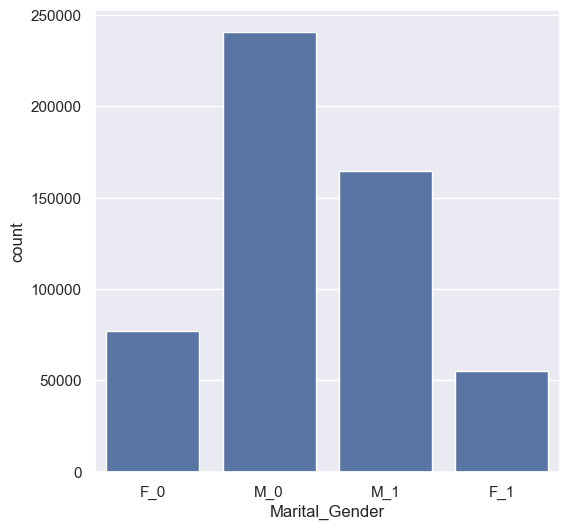

In [261]:
sns.countplot(x = df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

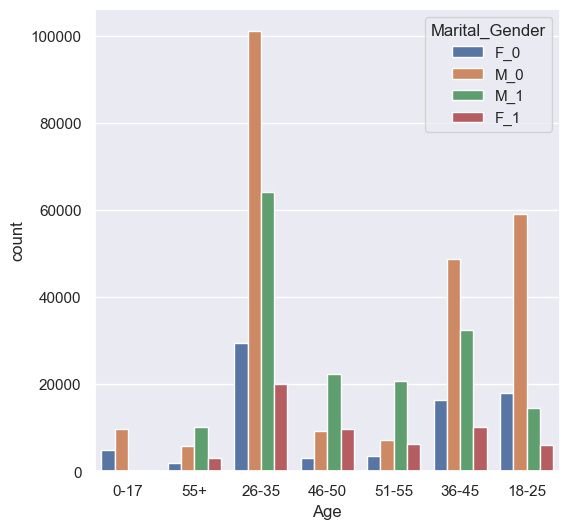

In [265]:
sns.countplot(x = df['Age'] , hue = df['Marital_Gender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

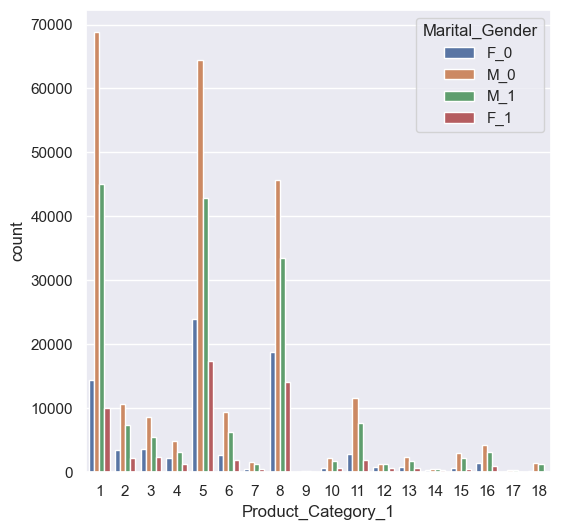

In [269]:
sns.countplot(x = df['Product_Category_1'] , hue = df['Marital_Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

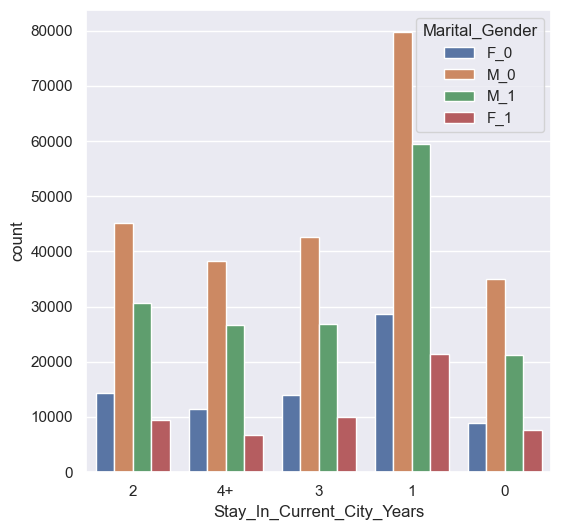

In [275]:
sns.countplot(x = df['Stay_In_Current_City_Years'] , hue = df['Marital_Gender'])

<Axes: xlabel='City_Category', ylabel='count'>

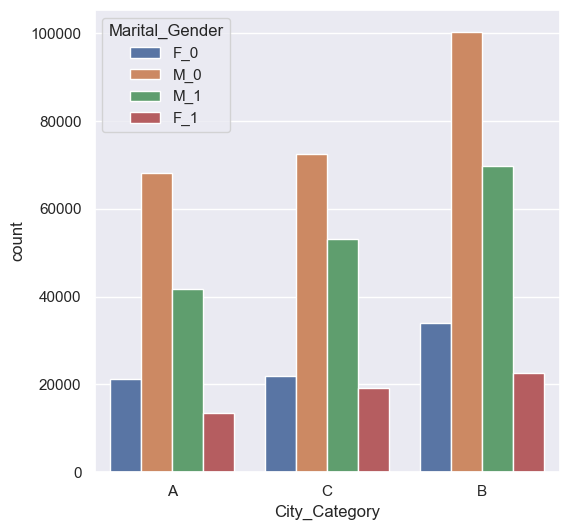

In [279]:
sns.countplot(x = df['City_Category'] , hue = df['Marital_Gender'])